# Machine Learning From Scratch: Nested Cross-Validation & K-NN

This notebook presents code that performs nested cross-validation and the k-nearest neighbour algorithm. It estimates distances between data samples, builds confusion matrices, and calculatesa performance metrics.

*This notebook does not rely on existing libraries that implement kNN, cross-validation, or any of the performance evaluation functions. Instead, it builds these algorithms from scratch using basic Python modules.*

Keywords:
 **sklearn, numpy, matplotlib, k-nn, data analysis, parameter selection, cross-validation**
 
 ----


## 1. Exploratory Data Analysis
The code below loads the iris datase:

In [12]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets # import datasets
from sklearn.metrics import accuracy_score
import numpy as np # import numpy
import matplotlib.pyplot as plt # import plots

from mpl_toolkits.mplot3d import Axes3D #
# set the seed for the random number generator
mySeed=1234567

# load data
iris = datasets.load_iris() # load data 
X = iris.data # get features
y = iris.target # get targets
#print(iris.DESCR) # print dataset description


### Plotting the data
With only 4 features (sepal length, sepal width, petal length, and petal width), and 3 classes, it is possible to use scatter plots to visualise interactions between different pairings of features. 

Below is a function that creates a 4x4 grid, with each off-diagonal subplot showing the interaction between two features, with each of the three classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a histogram on that feature.    

The function will be invoked as,

    myplotGrid(X,y)
    
where X is the training data and y are the labels.

----

In [13]:
def myplotGrid(X,y):
    '''
    Takes in data X and target y, and creates 
    visualisation as a pairwise scatter plot.
    "The diagonal plots the marginal histograms
    of the 4 features. The off diagonals contain
    scatterplots of all possible pairs of features."
    (Murphy, Kevin, 2012 p.6)
    
            Parameters:
                    X (array): A collection of data
                    y (array): A collection of labels representing classes
            Returns:
                    figure consisting of histogram & scatter subplots
    '''
    # Create array of labels:
    labels = (['sepal length (cm)', 
               'sepal width (cm)', 
               'petal length (cm)', 
               'petal width (cm)'])
    
   # Create figure and subplots:
    fig, ax = plt.subplots(4,4)
    fig.set_size_inches(15,15)
    
    
    # Create a nested for loop to iterate the subplots and populate them with data:
    for i in range (0,4):
        for j in range (0,4):
            
            # Histograms:
            if i == j:
                ax[i,j].hist(X[:, i])
            # Scatterplots:
            else:
                ax[i,j].scatter(X[:,j], X[:,i], c=y, cmap=plt.cm.Paired)
            
            # Labels:
            ax[i,0].set_ylabel(labels[i])
            ax[3,j].set_xlabel(labels[j])

    # this function doesn't return anything, yet plots graphs when called, 
    # since the "hist" and "scatter" functions inside the for loop inherently print the graphs.


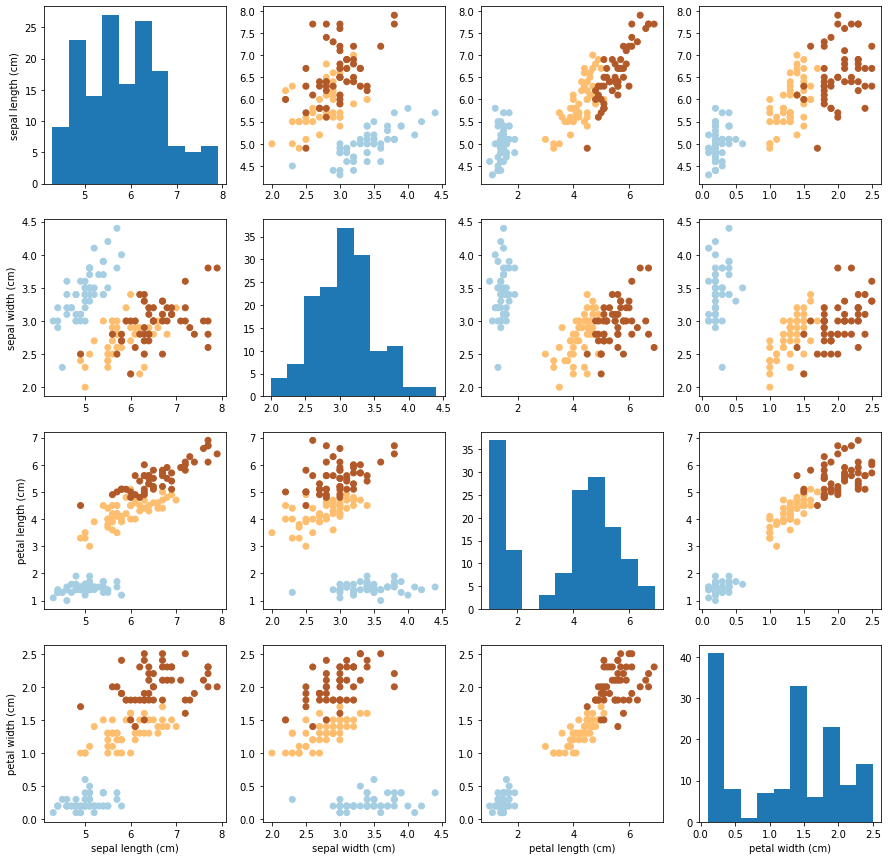

In [14]:
# run the plotting function
myplotGrid(X,y) # visualise data

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings (e.g., from webcams or other errors) they usually contain some amount of noise that makes classification more challenging. The cell below invokes the exploratory data analysis function from above on a noisy version of the data X. This is done by including some Gaussian noise.

-----


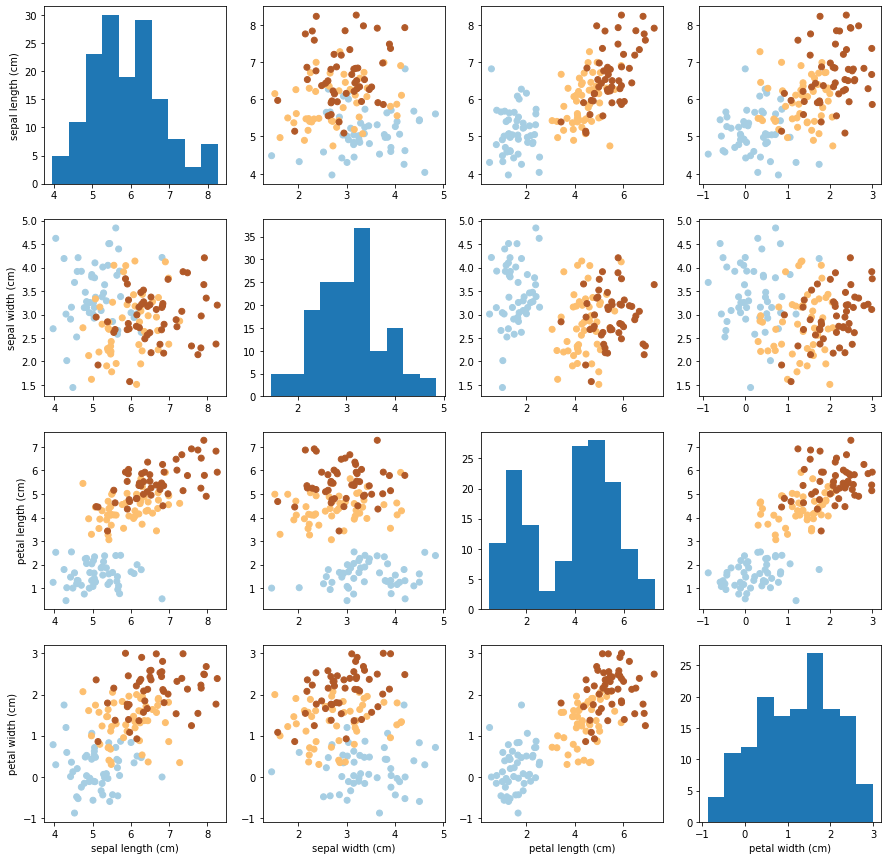

In [15]:
mySeed = 1234567
np.random.seed(mySeed)
XN=X + np.random.normal (0,0.5, X.shape)

myplotGrid(XN, y)

## 2. Implementing kNN

The proceeding cells develop code for performing k-Nearest Neighbour classification from scratch, comparing results with those of numpy functions.

The defined function will perform k-NN on a given set of a data, and will be invoked as such: 

        y_ = mykNN(X,y,X_, options)
        
where X is the training data, y is the training outputs, X\_ are the testing data and y\_ are the predicted outputs for X\_. 

----

### Helper Function and verification 1: Euclidean Distance
This cell defines a home-made Euclidean distance function, and cross-checks its results with that of the numpy "linalg" function.

In [16]:
# remember to run on XN

# My Euclidean distance helper function:

def myEucDistance(in1,in2):
    '''
    Takes in two arrays, in1 and in2,
    and returns the Euclidean distance 
    between them (treating them as vectors).
    in1 and in2 arrays must be of the same 
    length.
            Parameters:
                    in1 (array): An array (vector) representing a data point. 
                    in2 (array): An array (vector) representing a data point.

            Returns:
                    myEucDist (float): A value representing the Euclidean distance
                    
    '''
    # Create a custom error here to verify the two arrays
    # are the same length?
    
    # Assign vector dimensions to variables:
    a1 = in1[0]
    a2 = in1[1]
    
    b1 = in2[0]
    b2 = in2[1]
    
    # Establish vector size based on length of in1 array:
    vectorSize = len(in1)
    
    # Initialise a squared distance variable to zero:
    sqDist = 0
    
    # Iterate the vector elements and accumulate the square distances:
    for i in range (0, vectorSize):
        sqDist += ((in1[i] - in2[i]) ** 2)
    
    # Sum the results:
    sqDist = np.sum(sqDist)
    
    # Get the square root – this is our Euclidean distance result:
    myEucDist = np.sqrt(sqDist)
    
    # Return the Euclidean distance result:
    return myEucDist

# Euclidean distance function with numpy (for verification):
def numpyEucDistance(in1,in2):
    '''
    Takes in two arrays, in1 and in2,
    and returns the Euclidean distance 
    between them (treating them as vectors)
    using a numpy algorithm.
    in1 and in2 arrays must be of the same 
    length
            Parameters:
                    in1 (array): An array (vector) representing a data point. 
                    in2 (array): An array (vector) representing a data point.

            Returns:
                    npEucDist (float): A value representing the Euclidean distance
    '''
    
    #print("in1 ", in1)
    
    # error happening here
    #vectorSize = len(in1)
    
    # np.linalg.norm() will default to order 2, which is euclidean. if you specify order 1, it gives manhattan
    
    npEucDist = np.linalg.norm((in1-in2), ord=2) #euclidean
    
    #manDist = np.linalg.norm(in1-in2, ord=1) #manDist
    
    return npEucDist ##eucledian distance between in1 and in2##

# Comparison and verification using arbitrary arrays:
    
c = np.array([1,2,3,4,8,9])
d = np.array([3,4,5,8,10,12])
myTest = myEucDistance(c,d)
numpyTest = numpyEucDistance(c,d)
print('my Euc Distance: ',myTest)
print('numpy Euc Distance: ', numpyTest)

# Print messages that verify whether the function works or not:
if myTest == numpyTest:
    print("My Euclidean function works!")
else:
    print("My Euclidean function doesn't work!")
  

my Euc Distance:  6.4031242374328485
numpy Euc Distance:  6.4031242374328485
My Euclidean function works!


### Helper Function and verification 2: Manhattan Distance
The following cell defines a home-made Manhattan distance function, and cross-checks its results with that of the numpy algorithm using "linalg".

In [17]:
# My Manhattan distance helper function:

def myManhattanDistance(in1,in2):
    '''
    Takes in two arrays, in1 and in2,
    and returns the Manhattan distance 
    between them (treating them as vectors)
    using a home-made algorithm, with help
    from numpy's "absolute" function.
    in1 and in2 arrays must be of the same 
    length
            Parameters:
                    in1 (array): An array (vector) representing a data point. 
                    in2 (array): An array (vector) representing a data point.

            Returns:
                    myAbsDist (float): A value representing the Euclidean distance
    '''
    # Initialise an absolute distance variable to zero:
    myAbsDist = 0
    
    # Establish vector size based on length of one of the incoming arrays:
    vectorSize = len(in1)
    
    # Iterate the vector size, and accumulate the absolute distances between
    # corresponding elements of the two vectors:
    for i in range(0, vectorSize):
        myAbsDist += ( (np.absolute(in1[i] - in2[i]) ) )
        
    # Return the absolute distance:
    return myAbsDist

# Manhattan distance function using numpy.linalg:

def manhattanDistance(in1,in2):
    '''
    Takes in two arrays, in1 and in2,
    and returns the Manhattan distance 
    between them (treating them as vectors)
    using numpy's linear algebra function.
    in1 and in2 arrays must be of the same 
    length
            Parameters:
                    in1 (array): An array (vector) representing a data point. 
                    in2 (array): An array (vector) representing a data point.

            Returns:
                    npAbsDist (float): A value representing the Euclidean distance
    '''
    # Call the linear algebra function, with order set to one to 
    # specify Manhattan distance:
    npAbsDist = np.linalg.norm(in1 - in2, ord=1) 
    
    return npAbsDist

# Comparison and verification using arbitrary arrays:
e = np.array([1,7,2,6,13,5])
f = np.array([3,8,0,2,10,12])

myTest = myManhattanDistance(e,f)
print("My test: ",myTest)
linAlgTest = manhattanDistance(e,f)
print("LinAlg test: ",linAlgTest)

# Print function verification:
if(myTest == linAlgTest):
    print("My Manhattan distance function works!")
else:
    print("My Manhattan distance function doesn't work!")

My test:  19
LinAlg test:  19.0
My Manhattan distance function works!


### Helper function 3: Get Nearest Neighbours (Euclidean)
The following cell will define a function to retrieve the nearest neighbour indices in a dataset X of the test point x_, using Euclidean distance.

In [18]:
def getNeighbours(x_, X, n, T, metric):
    '''
    Returns the incides of the n-nearest neighbours in the training
    data, X, to the point x_ in the test data.
    T is the total number of training data.
    The metric argument specifies whether this is
    calculated using the euclidean or manhattan 
    method.
            Parameters:
                    x_ (array): An array (vector) representing a data point. 
                    X (array): An array representing the dataset. 
                    n (int): Number of neighbours.
                    T (int): Total number of training data.
                    metric (str): Specified distance metric: 'euclidean' or 'manhattan'
            Returns:
                    nns (array): The indices of the n-nearest neighbours.
    '''
    # Initialise an empty array of distances:
    distances = []
    
    # Iterate over the training data, calling Euclidean distance function:
    for i in range (0,T):
        
        #eucDistance = numpyEucDistance(x_, X[i])
        
        
        if( metric == 'euclidean'):
            distance = myEucDistance(x_, X[i])
        elif( metric == 'manhattan'):    
            distance = myManhattanDistance(x_, X[i])
        
        # Append result to distances array:
        distances = np.append(distances, distance)
    
    # Sort the distances by indices:
    sortedDistanceIndices = np.argsort(distances)
    
    # Retrieve the n nearest neighbours, by returning all elements
    # in the array up to n (:n)
    nns = sortedDistanceIndices[:n]
    
    return nns


### Helper function: Return NN Labels
The following cell defines a function that returns the predicted label of the test data, given the indices of the n-nearest neighbours.

In [19]:
def returnNNLabels( nnIndices, y ):
    '''
    Iterates the given indices, and returns the 
    target (y) values at those indices.
            Parameters:
                    nnIndcies (array): Array of indices of the n-nearest neighbours.
                    y (array): Array of labels / target values. 
            Returns:
                    labels (array): Array of the labels of the n-nearest indices. 
    '''
    # Establish length of given indices list:
    length = len(nnIndices)
    # Initialise an empty array of labels:
    labels = []
    
    # Iterate the given indices:
    for i in range (0, length):
        # Push the labels of the n-nearest neighbours to the labels array:
        labels = np.append(labels, y[nnIndices[i]])
    
    return labels


In [20]:
def assignLabel(nLabels):
    '''
    Takes nLabels of k nearest neighbours to the test point,
    and assigns to the test point the label that occurs most 
    frequently within nLabels
            Parameters:
                    nLabels (array): Array of the labels of the n-nearest indices.
            Returns:
                    assignedLabel (int): The label that occurs most frequently in nLabels.
    '''
    # Cast the label classifiers from floats to ints,
    # so that the bincount function can be performed:
    nLabelsInts = nLabels.astype(int)
    
    counts = np.bincount(nLabelsInts)
    
    # Use argmax to find the most frequent label, and create a new variable:
    assignedLabel = np.argmax(counts)
    
    return assignedLabel




### the big mega function

In [21]:
# function takes data that is already split

def mykNN ( X, y, X_, n, metric):
    '''
    Returns an array of predicted labels of a given data set, 
    using helper functions defined above. 
    It iterates the test points, retrieving the indicies of
    the nearest neighbour for each, then returns the class labels
    at those indices. It then determines the most frequently occurring
    label, and adds this to the return array.
                Parameters:
                    X (array): An array representing the dataset. 
                    y (array): An array of labels / target values.
                    X_ (array): An array representing the test data.
                    n (int): Specified number of neighbours.
                    metric (str): Specified distance metric ('euclidean' or 'manhattan')
    
    
    
    '''
    # X is training data
    # y is training output
    # n = number of neighbours
    
    
    #neighbours = n
    
    y_pred = []
    y_test = []
    
    # iterate the test points
    for i in range (0, (len(X_) )):
        x_ = X[i]
        #y_ = y[i]
        
        
        #theAssigned = assignLabel( returnNNLabels (     (getNeighbours (x_, X, n, (len(X)), metric)), y   )   )

        myNeighbours = getNeighbours (x_, X, n, len(X), metric)
        
        #theReturned = returnNNLabels(myNeighbours, y)
        
        theAssigned = assignLabel(returnNNLabels(myNeighbours, y))
        
        #theAssigned = assignLabel( theReturned )
        #y_pred = np.append(y_pred, theAssignedLabel)
        
        #shove into array
        y_pred = np.append(y_pred, theAssigned)
    
        #y_test = np.append(y_test, y_)
    
    return y_pred

#split the data
mySeed = 1234567
np.random.seed(mySeed)
indices = np.random.permutation(X.shape[0])
bins = np.array_split(indices, 2)
foldTrain = bins[0]
foldTest = bins[1]

In [22]:
mykNN ( X[foldTrain], y[foldTrain], X[foldTest], 10, 'euclidean')

array([2., 1., 0., 1., 1., 0., 1., 2., 0., 0., 1., 2., 2., 0., 2., 1., 0.,
       2., 0., 0., 2., 1., 0., 0., 1., 1., 1., 0., 2., 2., 2., 0., 1., 2.,
       0., 1., 0., 1., 0., 2., 2., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 2., 2., 1., 0., 2., 1., 1., 0., 2., 2., 1.,
       1., 2., 1., 2., 1., 2., 1.])

## 3. Nested Cross-validation using the above implementation of KNN

In the proceeding cells, code is developed for performing 5-fold nested cross-validation along with the implemenation of k-NN above. The code evaluates classifier performance. 

The code for nested cross-validation invokes the above kNN function (see above), and will be invoked as such:

    accuracies_fold, best_parameters_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is the data matrix (containing all samples and features for each sample), 5 is the number of folds, y are the known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan']`` evaluates the two distances on the validation sets.  mySeed is simply a random seed to enable us to replicate the results. 

**Notes:** 
- cross-validation is performed on both the original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- two distance functions are evaluated: Euclidean distance, and Manhattan distance
- the function returns a list of accuracies per fold, and a list of the corresponding parameters
- for each **fold**, the function will print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)

----

#### Helper functions:

In [23]:
def myAccuracy(y_test, y_pred):
    '''
    Returns the accuracy score of the kNN algorithm given
    the specific test data and predicted data. It tests 
    for instances when these two values are equal, 
    accumulates them, and divides by the length of the
    test data.
                Parameters: 
                        y_test (array): An array of true labels.
                        y_pred (array): An array of predicted labels.
                Returns:
                        accuracy (float): A normalised value representing the accuracy.
    '''
    
    #sum up the correct predictions and divide by length of the array:
    
    accuracy= (y_test == y_pred).sum() / float(len(y_test))
    
    return accuracy

In [24]:
def myConfMat(y_test,y_pred,classno):
    '''
    Returns the confusion matrix of the given data
    that represents the performance of the kNN model. 
    It initialises a matrix (whose dimensions correspond 
    to the number of possible classes) with zeros.
    It then iterates over the y_test and y_pred arrays
    simultaneously, and updates the elements based on 
    where y_test and y_pred correspond to one another.
            Parameters: 
                    y_test (array): An array of true labels.
                    y_pred (array): An array of predicted labels.
                    classno (int): Total number of classes.
            
    
    '''
    # initialize the confusion matrix to zeros
    C= np.zeros((classno,classno))
    
    #loop through all results and update the confusion matrix.
    # the zip function places y_test and y_pred arrays in parallel, making it easy to cross-reference.
    for i, j in zip(y_test, y_pred):
        
        C[i][j] = C[i][j] + 1
        
    return C



#### Nested Cross-Validation Function:

In [25]:
# nested cross validation function
# X - data / features
# y - outputs
# foldK - number of folds
# nns - list of number of neighbours parameter for validation
# dists - list of distances for validation
# mySeed - random seed
# returns: accuracy over 5 folds (list)

from sklearn.neighbors import KNeighborsClassifier

def myNestedCrossVal(X,y,foldK,nns,dists,mySeed):
    '''
    Returns the accuracy and confusion matrix for each fold, having 
    trained the model on a subset of data, and validated the trained 
    model on the remaining data. The training, testing, and validation
    sets are rotated each time. For each fold, the total number of each
    parameters, with respect to number of neighbours and distances metrics,
    are iterated, and the combination producing the highest score is returned. 
            Parameters:
                    X (array): An array representing the whole data set.
                    y (array): An array of class labels / targets.
                    foldK (int): The number of folds.
                    nns (range): The range of neighbours to evaluate.
                    dists (array of strings): The distance metrics to evaluate.
    '''
    
    
    
    np.random.seed(mySeed)
    accuracy_fold=[]
    
    cMatrixArray = [] #create empty array to put all fold matrices into
    
    #TASK: use the function np.random.permutation to generate a list of shuffled indices from in the range (0,number of data)
    #(you did this already in a task above)
    L = (range(X.shape[0]))
    #print(L)
    indices= np.random.permutation(L)
    #print("indices: ", indices)
    
    
    
    #TASK: use the function array_split to split the indices to foldK different bins (here, 5)
    #uncomment line below
    bins = np.split(indices, foldK)
    
    
    #no need to worry about this, just checking that everything is OK
    assert(foldK==len(bins))
    
    #loop through folds
    for i in range(0,foldK):
        foldTrain=[] # list to save current indices for training
        foldTest=[]  # list to save current indices for testing
        foldVal=[]    # list to save current indices for validation

        #loop through all bins, take bin i for testing, the next bin for validation, and the rest for training
        length = len(bins)
        
        foldTest = bins[i]
        
        # Use modulo on the length to wrap back round to zero, for when i + 1 exceeds foldK length:
        foldVal = bins[(i+1)%(length)]
        
        
        for j in range(0,len(bins)):
            
            if (j != i and j != ((i+1) % (length)) ):
                foldTrain.extend(bins[j])
            
        #no need to worry about this, just checking that everything is OK
        #assert not np.intersect1d(foldTest,foldVal)
        #assert not np.intersect1d(foldTrain,foldTest)
        #assert not np.intersect1d(foldTrain,foldVal)
       
        bestDistance='' #save the best distance metric here
        bestNN=-1 #save the best number of neighbours here
        bestAccuracy=-10 #save the best attained accuracy here (in terms of validation)
        
        # set X_train and y_train to their respective data at the indices of foldTrain
        X_train = X[foldTrain]
        y_train = y[foldTrain]
        
        X_val = X[foldVal]
        y_val = y[foldVal]
        
        # nns and dists
        nnsLength = len(nns)
        distsLength = len(dists)
        
        # loop through all parameters (one for loop for distances, one for loop for nn)
        for j in range(0, nnsLength):
            for k in range (0, distsLength):
                
                #==================
                #===================
                # using my own KNN:
                myY_pred = mykNN ( X_train, y_train, X_val, nns[j], dists[k])
                
                #get the accuracy score:
                
                myScore = myAccuracy(y_val, myY_pred)
                
                
                # save parameters if results are the best so far:
                if(myScore > bestAccuracy):
                    bestAccuracy = myScore
                    bestDistance = dists[k]
                    bestNN = nns[j]
                    
        print('** End of val for this fold, best NN', bestNN, 'best Dist', bestDistance)
        
        #extend your training set by including the validation set
        X_train = np.append(X_train, X_val, axis = 0)
        y_train = np.append(y_train, y_val, axis = 0)
        
        X_test = X[foldTest]
        y_test = y[foldTest]
        
        #X_val = X[foldVal]
        
        #============
        #Don't use sklearn, use your kNN:
        #evaluate on test data:
        #knn = KNeighborsClassifier(n_neighbors = bestNN, metric= bestDistance)
        
        #train k-NN classifier on new training set and test on test set
        #knn.fit(X_train, y_train)
        #y_pred=knn.predict(X_test)
        #===========
        
        
        # evaluate on test data using your KNN
        y_pred = mykNN ( X_train, y_train, X_test, bestNN, bestDistance)
        
        y_pred = y_pred.astype(int)
        
        
        #print("y_pred:",y_pred)
        #print("y_test: ", y_test)
        accuracy = accuracy_score(y_test,y_pred)
        
        accuracy = myAccuracy(y_test, y_pred)
        
        #get performance on fold, save result in accuracy_fold array
        accuracy_fold = np.append(accuracy_fold, accuracy)
        
        # print confusion matrix for each fold:
        
        myCMatrix = myConfMat(y_test, y_pred, len(np.unique(y)))
        
        # append each fold's confusion matrix to the confusion matrix array:
        cMatrixArray.append(myCMatrix)
    
        print('==== Final Cross-val on test on fold', i, ' with NN', bestNN, 'dist', bestDistance, ' accuracy ',accuracy_score(y[foldTest],y_pred))

    return accuracy_fold, cMatrixArray
    
#call your nested crossvalidation function:
 
accuracy_fold, confusion_matrix_fold = myNestedCrossVal(X, y, 5, list(range(1,11)),['euclidean','manhattan'],mySeed)
print("accuracy fold: ",accuracy_fold)

accuracyMeanClean = np.mean(accuracy_fold)
print("accuracy mean clean: ", accuracyMeanClean)

accuracy_fold_noisy, confusion_matrix_fold_noisy = myNestedCrossVal(XN, y, 5, list(range(1,11)),['euclidean', 'manhattan'], mySeed)
print("noisyAccuracy fold: ", accuracy_fold_noisy)

accuracyMeanNoisy = np.mean(accuracy_fold_noisy)
print("accuracyMean noisy: ", accuracyMeanNoisy)

** End of val for this fold, best NN 10 best Dist euclidean
==== Final Cross-val on test on fold 0  with NN 10 dist euclidean  accuracy  0.2
** End of val for this fold, best NN 1 best Dist euclidean
==== Final Cross-val on test on fold 1  with NN 1 dist euclidean  accuracy  0.3
** End of val for this fold, best NN 1 best Dist euclidean
==== Final Cross-val on test on fold 2  with NN 1 dist euclidean  accuracy  0.23333333333333334
** End of val for this fold, best NN 1 best Dist euclidean
==== Final Cross-val on test on fold 3  with NN 1 dist euclidean  accuracy  0.4
** End of val for this fold, best NN 2 best Dist euclidean
==== Final Cross-val on test on fold 4  with NN 2 dist euclidean  accuracy  0.26666666666666666
accuracy fold:  [0.2        0.3        0.23333333 0.4        0.26666667]
accuracy mean clean:  0.27999999999999997
** End of val for this fold, best NN 4 best Dist euclidean
==== Final Cross-val on test on fold 0  with NN 4 dist euclidean  accuracy  0.16666666666666666
*

### 3.2. Summary of results

Results of the **clean** data, where **total** is given as an average over all the folds, and $\pm$ the standard deviation:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .2  |  10 | euclidean  |
| 2 | .2  |  1 | euclidean  |
| 3 | .23  |  1 | euclidean  |
| 4 | .4  |  1 | euclidean  |
| 5 | .26  |  2 | euclidean  |
| **total** | 0.28 $\pm$ 0.3 |   |    |

Results of the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .16  |  4 | euclidean  |
| 2 | .3  |  3 | euclidean  |
| 3 | .23  |  1 | euclidean  |
| 4 | .36 |  5 | euclidean  |
| 5 | .26  |  2 | euclidean|
| **total** | 0.27 $\pm$ 0.3 |   |    |




### 3.3. Confusion matrix summary

The final cell of code summarises the overall results of the nested cross validation evaluation of my K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). It prints the two matrices.

----

In [26]:
# exclude certain return values of a function by using "_":

_, clean = myNestedCrossVal(X, y, 5, list(range(1,11)),['euclidean','manhattan'],mySeed)

_, noisy = myNestedCrossVal(XN, y, 5, list(range(1,22)), ['euclidean','manhattan'], mySeed)

# function takes in the two matrix arrays
def printSummaryMatrices(in1, in2):
    '''
    Returns the summary matrices of the two incoming arrays, 
    by summing the contents of the sub-arrays of each. 
            Parameters:
                    in1 (array): An array of sub-arrays representing confusion matrices of each fold.
                    in2 (array): An array of sub-arrays representing confusion matrices of each fold.
            Returns:
                    summaryClean (npmatrix): Summary matrix for in1.
                    summaryNoisy (npmatrix): Summary matrix for in2.
    '''
    #convert all arrays into matrices
    # create empty summray matrices:
    summaryClean = np.zeros(9)
    summaryClean = np.asmatrix(summaryClean)
    #reshape:
    summaryClean = np.reshape(summaryClean, (3,3))
    # now summary clean is a 3x3 empty matrix

    summaryNoisy = np.zeros(9)
    summaryNoisy = np.asmatrix(summaryNoisy)
    summaryNoisy = np.reshape(summaryNoisy, (3,3))
    # now summarynoisy is a 3x3 empty matrix

    # loop through and add all submatrices
    for i in range(0, (len(in1))):
        summaryClean += in1[i]
        

    for i in range(0, (len(in2))):
        summaryNoisy += in2[i]
        
    return summaryClean, summaryNoisy

# View the matrices:
compareMatrices = printSummaryMatrices(clean, noisy)

print(compareMatrices[0], '\n\n' , compareMatrices[1])

** End of val for this fold, best NN 10 best Dist euclidean
==== Final Cross-val on test on fold 0  with NN 10 dist euclidean  accuracy  0.2
** End of val for this fold, best NN 1 best Dist euclidean
==== Final Cross-val on test on fold 1  with NN 1 dist euclidean  accuracy  0.3
** End of val for this fold, best NN 1 best Dist euclidean
==== Final Cross-val on test on fold 2  with NN 1 dist euclidean  accuracy  0.23333333333333334
** End of val for this fold, best NN 1 best Dist euclidean
==== Final Cross-val on test on fold 3  with NN 1 dist euclidean  accuracy  0.4
** End of val for this fold, best NN 2 best Dist euclidean
==== Final Cross-val on test on fold 4  with NN 2 dist euclidean  accuracy  0.26666666666666666
** End of val for this fold, best NN 4 best Dist euclidean
==== Final Cross-val on test on fold 0  with NN 4 dist euclidean  accuracy  0.16666666666666666
** End of val for this fold, best NN 3 best Dist euclidean
==== Final Cross-val on test on fold 1  with NN 3 dist eu